In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

# dimensions of our images.
img_width, img_height = 200, 200

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 1914
nb_validation_samples = 182
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('sigmoid'))                #Added
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# augmentation 
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# augmentation 
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

checkpoint = ModelCheckpoint("first1_cp.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=5)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)




Found 1916 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


C:\Users\sarip\AppData\Local\Temp\ipykernel_1136\853526568.py:76: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


NameError: name 'scipy' is not defined

In [2]:
model.save('firstimplementation-adadelta.h5') 

dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])


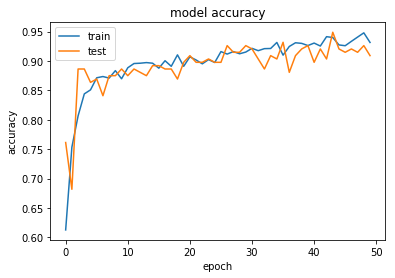

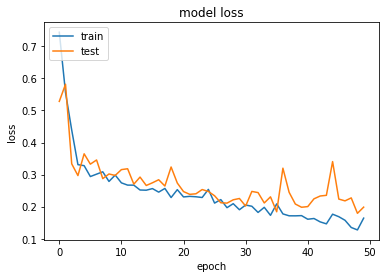

In [3]:

import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 1s 754ms/step


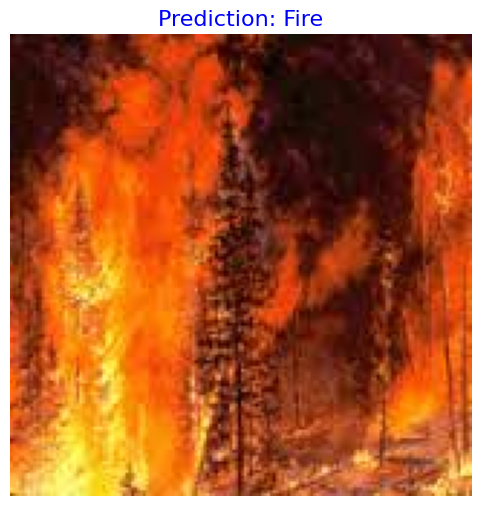

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model("C:\\Users\\sarip\\OneDrive\\Desktop\\jupyter\\ForestFireDetection\\firstimplementation-adadelta.h5")  # Replace with the path to your saved model

# Function to preprocess the image
def preprocess_image(img_path, target_size=(200, 200)):
    img = load_img(img_path, target_size=target_size)  # Load image and resize
    img_array = img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize
    return img_array

# Predict function
def predict_image(img_path):
    processed_image = preprocess_image(img_path)
    prediction = model.predict(processed_image)
    # Assuming the output is a probability for the "fire" class
    return "No Fire" if prediction[0][0] > 0.5 else "Fire"
    
def display_image_with_prediction(img_path):
    # Load and preprocess image
    img = load_img(img_path)  # Load image without resizing for display
    prediction = predict_image(img_path)
    
    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Prediction: {prediction}", fontsize=16, color="blue")
    plt.show()

# Test the function
img_path = "C:\\Users\\sarip\\OneDrive\\Desktop\\jupyter\\ForestFireDetection\\data\\train\\Fire\\fire-45.7396875153.png" # Replace with the path to the input image
display_image_with_prediction(img_path)

